# Task 1

In [110]:
import pandas as pd

# Load the wine dataset
wine_df = pd.read_excel("wine.xlsx")

# Load the data dictionary
data_dictionary = pd.read_excel("DataDictionary_Wine.xlsx")

wine_df.head()


,INDEX,Purchase,Cases,STARS,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex
0,1,1,3,2,3.2,1.160,-0.98,54.2,-0.567,,268,0.99280,3.33,-0.59,9.9,0,8
1,2,1,3,3,4.5,0.160,-0.81,26.1,-0.425,15,-327,1.02792,3.38,0.7,,-1,7
2,4,1,5,3,7.1,2.640,-0.88,14.8,0.037,214,142,0.99518,3.12,0.48,22,-1,8
3,5,1,3,1,5.7,0.385,0.04,18.8,-0.425,22,115,0.99640,2.24,1.83,6.2,-1,6
4,6,1,4,2,8.0,0.330,-1.26,9.4,,-167,108,0.99457,3.12,1.77,13.7,0,9


In [111]:
numeric_columns = [
    "FixedAcidity", "VolatileAcidity", "CitricAcid", "ResidualSugar", 
    "Chlorides", "FreeSulfurDioxide", "TotalSulfurDioxide", "Density", 
    "pH", "Sulphates", "Alcohol"
]

# Convert to numeric and set errors='coerce' to convert invalid parsing to NaN
wine_df[numeric_columns] = wine_df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Check for missing values in the dataset
missing_values = wine_df.isnull().sum()
missing_values

INDEX                    0
Purchase                 0
Cases                    0
STARS                    0
FixedAcidity             0
VolatileAcidity          0
CitricAcid               0
ResidualSugar          616
Chlorides              638
FreeSulfurDioxide      647
TotalSulfurDioxide     682
Density                  0
pH                     395
Sulphates             1210
Alcohol                653
LabelAppeal              0
AcidIndex                0
dtype: int64

## Histograms

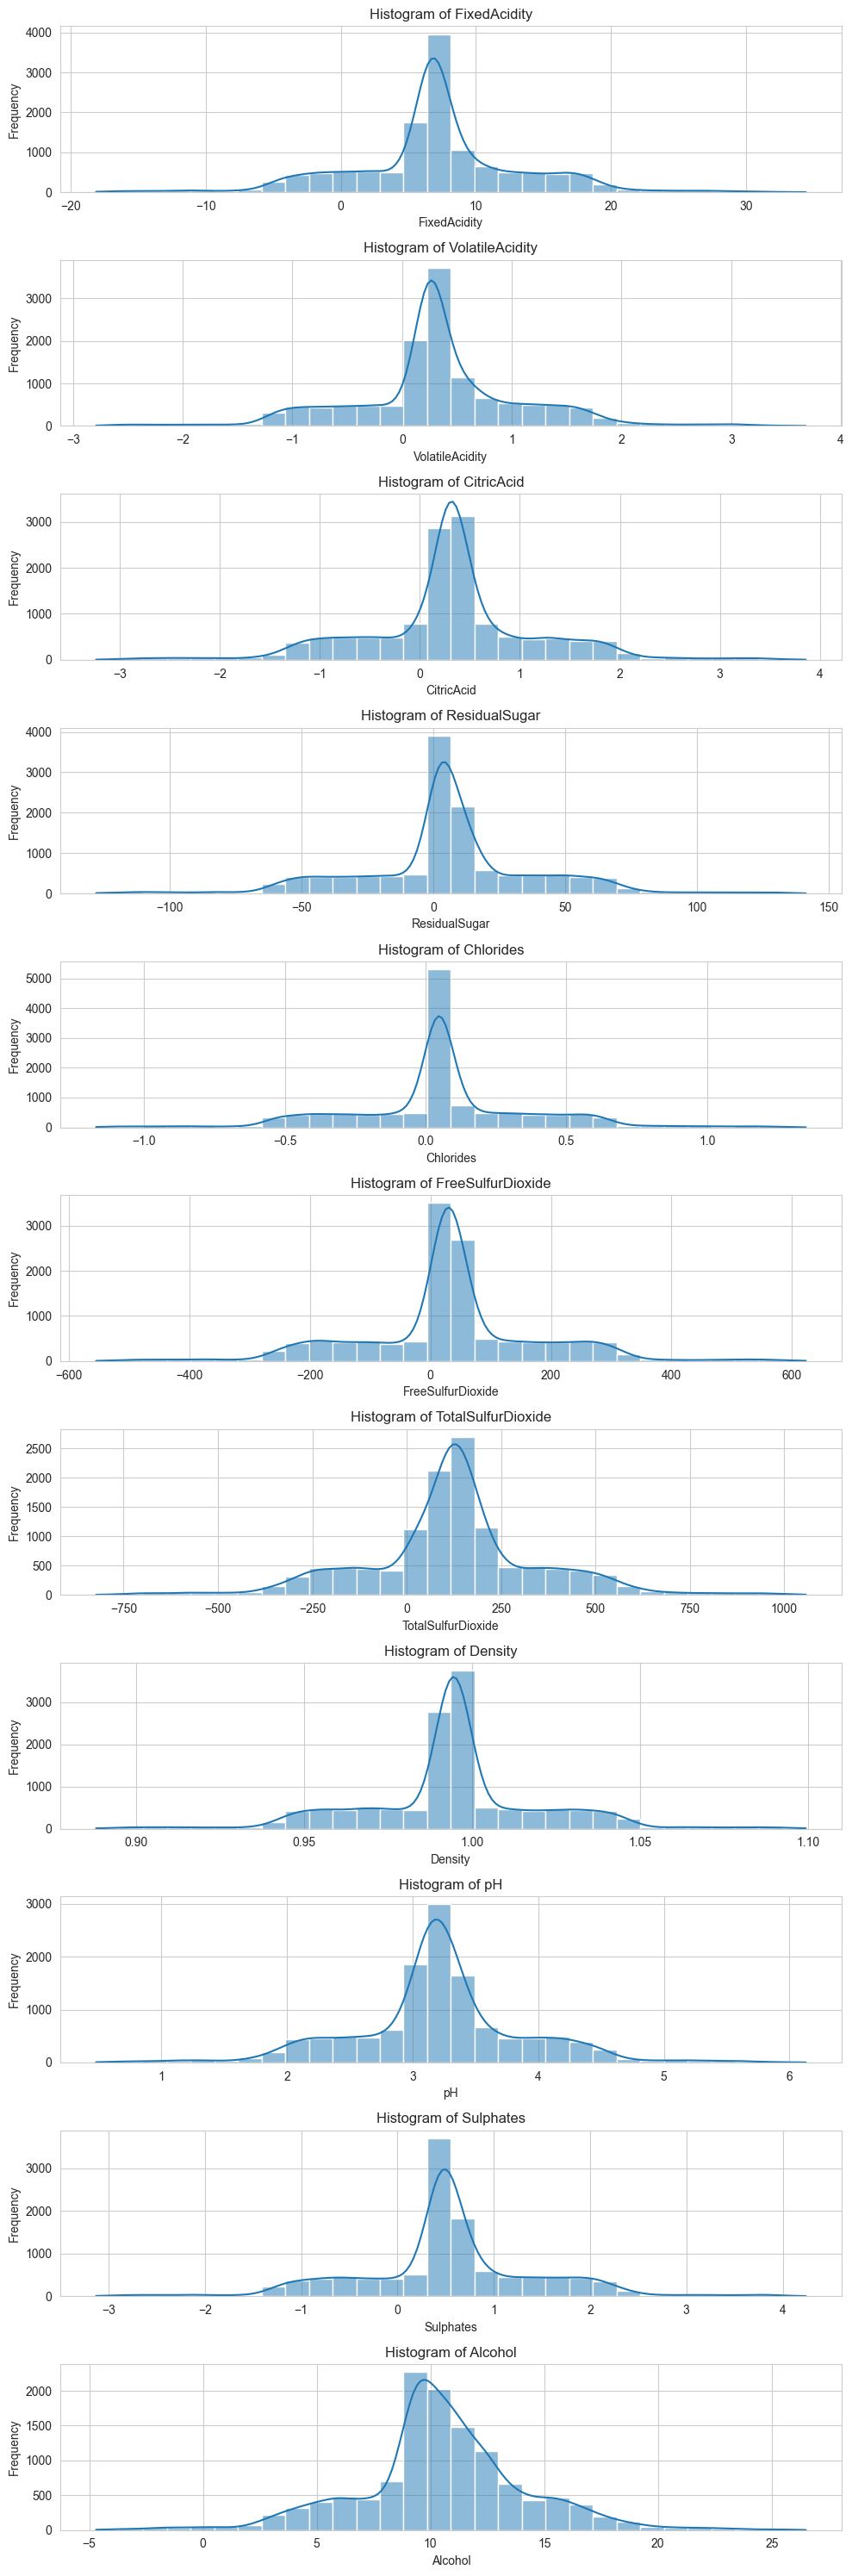

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

fig, axes = plt.subplots(nrows=len(numeric_columns), figsize=(10, 30))

for i, column in enumerate(numeric_columns):
    sns.histplot(wine_df[column], ax=axes[i], kde=True, bins=30)
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### Analysis of Histograms:

- **FixedAcidity, VolatileAcidity, CitricAcid**: These variables seem to be centered around 0, and they follow approximately normal distributions. However, there are some outliers that can be observed in these histograms.
  
- **ResidualSugar**: Most wines have a residual sugar value around 0, but there are some wines with higher residual sugar values.
  
- **Chlorides**: Most wines have chloride values close to 0, with a few exceptions.
  
- **FreeSulfurDioxide, TotalSulfurDioxide**: These variables have a wider range of values, with some outliers at the extreme ends.
  
- **Density**: Most wines have a density close to 1. There are a few wines with very low or very high density values.
  
- **pH**: The pH values are mostly clustered around the 3.0 mark, indicating slightly acidic wines.
  
- **Sulphates**: Most wines have sulphate values around 0, but there are wines with higher sulphate values.
  
- **Alcohol**: The alcohol content for most wines is clustered around 10%, with some wines having very high or very low alcohol content.

### Descriptive Stats

- There are some negative values in columns where they might not make sense (like Alcohol or ResidualSugar). This could be due to data entry errors or how the data was collected and processed. These will need to be addressed before modeling.
- Some columns have a wide range of values, suggesting potential outliers.

In [113]:
descriptive_stats = wine_df[numeric_columns].describe().T[["mean", "std", "min", "50%", "max"]]
descriptive_stats.rename(columns={"50%": "median"}, inplace=True)
descriptive_stats


,mean,std,min,median,max
FixedAcidity,7.075717,6.317643,-18.10000,6.90000,34.40000
VolatileAcidity,0.324104,0.784014,-2.79000,0.28000,3.68000
CitricAcid,0.308413,0.862080,-3.24000,0.31000,3.86000
ResidualSugar,5.418733,33.749379,-127.80000,3.90000,141.15000
Chlorides,0.054822,0.318467,-1.17100,0.04600,1.35100
FreeSulfurDioxide,30.845571,148.714558,-555.00000,30.00000,623.00000
TotalSulfurDioxide,120.714233,231.913211,-823.00000,123.00000,1057.00000
Density,0.994203,0.026538,0.88809,0.99449,1.09924
pH,3.207628,0.679687,0.48000,3.20000,6.13000
Sulphates,0.527112,0.932129,-3.13000,0.50000,4.24000


### Correlation Analysis

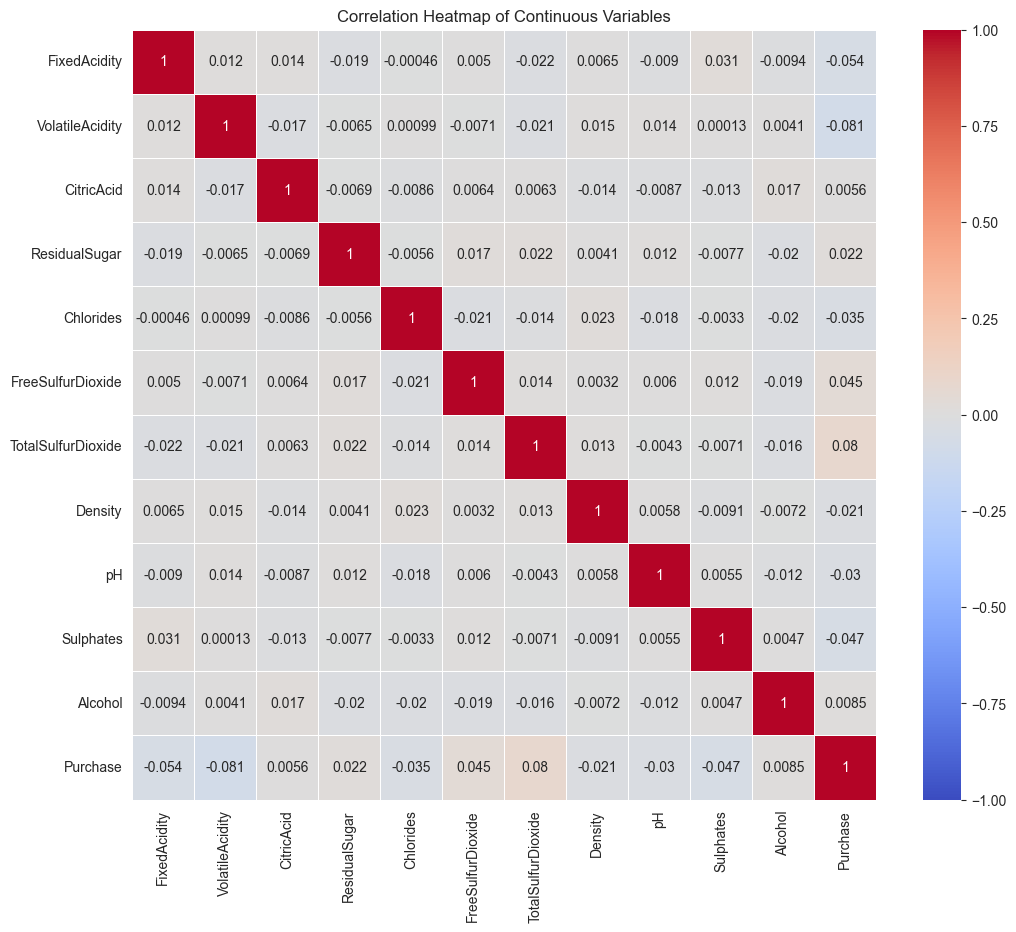

In [114]:
correlations = wine_df[numeric_columns + ["Purchase"]].corr()
target_correlations = correlations["Purchase"].sort_values(ascending=False)
target_correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlations, annot=True, cmap="coolwarm", linewidths=.5, vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Continuous Variables")
plt.show()

### Correlation with the Target Variable `Purchase`:

- **TotalSulfurDioxide**: Positive correlation of 0.080
- **FreeSulfurDioxide**: Positive correlation of 0.045
- **ResidualSugar**: Positive correlation of 0.022
- **Alcohol**: Slight positive correlation of 0.008
- **CitricAcid**: Very slight positive correlation of 0.006
- **Density**: Negative correlation of -0.021
- **pH**: Negative correlation of -0.030
- **Chlorides**: Negative correlation of -0.035
- **Sulphates**: Negative correlation of -0.047
- **FixedAcidity**: Negative correlation of -0.054
- **VolatileAcidity**: Negative correlation of -0.081

Observations:
1. The correlations of all continuous variables with the target variable `Purchase` are quite low, suggesting that no single variable has a strong linear relationship with the purchase decision.
2. Among the variables, `TotalSulfurDioxide` has the highest positive correlation, and `VolatileAcidity` has the highest negative correlation with `Purchase`.

Notes & General Toughts:
1. **High Correlation Pairs**: Some variable pairs show higher correlation, either positive or negative.
   - `FreeSulfurDioxide` and `TotalSulfurDioxide` have a strong positive correlation, suggesting that when one increases, the other tends to as well.
   - `FixedAcidity` and `Density` show some positive correlation.
   - `FixedAcidity` and `pH` have a negative correlation, which is consistent with the understanding that as acidity increases, pH (which measures alkalinity) decreases. 
<br>
<br>

2. **Correlation with `Purchase`**: As noted earlier, no single variable has a very strong correlation with the target variable. This implies that the purchase decision is influenced by a combination of factors rather than any single one.

3. **Multicollinearity Concern**: In logistic regression, multicollinearity among the predictors can be a concern. If two or more variables are highly correlated, it may be challenging to identify the individual effect of one predictor on the target variable. The strong correlation between `FreeSulfurDioxide` and `TotalSulfurDioxide` could be an example of this. Before modeling, we may consider addressing multicollinearity, for instance, by removing one of the variables from the model or using techniques like principal component analysis (PCA).

## Missing Values

In [115]:
missing_percentage = (missing_values / len(wine_df)) * 100
missing_percentage


INDEX                 0.000000
Purchase              0.000000
Cases                 0.000000
STARS                 0.000000
FixedAcidity          0.000000
VolatileAcidity       0.000000
CitricAcid            0.000000
ResidualSugar         4.814381
Chlorides             4.986323
FreeSulfurDioxide     5.056663
TotalSulfurDioxide    5.330207
Density               0.000000
pH                    3.087143
Sulphates             9.456819
Alcohol               5.103556
LabelAppeal           0.000000
AcidIndex             0.000000
dtype: float64

- `ResidualSugar`: 4.81% missing values
- `Chlorides`: 4.99% missing values
- `FreeSulfurDioxide`: 5.06% missing values
- `TotalSulfurDioxide`: 5.33% missing values
- `pH`: 3.09% missing values
- `Sulphates`: 9.46% missing values
- `Alcohol`: 5.10% missing values

All variables with missing values have less than 10% of their data missing. Given the size of our dataset, it's acceptable to impute these missing values rather than eliminating any variables entirely.

In [116]:
for column in numeric_columns:
    median_value = wine_df[column].median()
    wine_df[column].fillna(median_value, inplace=True)

remaining_missing = wine_df.isnull().sum()
remaining_missing

INDEX                 0
Purchase              0
Cases                 0
STARS                 0
FixedAcidity          0
VolatileAcidity       0
CitricAcid            0
ResidualSugar         0
Chlorides             0
FreeSulfurDioxide     0
TotalSulfurDioxide    0
Density               0
pH                    0
Sulphates             0
Alcohol               0
LabelAppeal           0
AcidIndex             0
dtype: int64

### Outliers

In [117]:
outliers = {}

for column in numeric_columns:
    Q1 = wine_df[column].quantile(0.25)
    Q3 = wine_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Find outliers
    outlier_values = wine_df[(wine_df[column] < lower_bound) | (wine_df[column] > upper_bound)]
    outliers[column] = len(outlier_values)

outliers_df = pd.DataFrame(list(outliers.items()), columns=['Variable', 'Number of Outliers'])
outliers_df


,Variable,Number of Outliers
0,FixedAcidity,2455
1,VolatileAcidity,2599
2,CitricAcid,2688
3,ResidualSugar,4065
4,Chlorides,4197
5,FreeSulfurDioxide,4202
6,TotalSulfurDioxide,2070
7,Density,3823
8,pH,2130
9,Sulphates,3659


Given the significant number of outliers for many variables, it's not feasible to simply remove all outlier records. I am going to use a new method I recently learned called **Winsorizing** which involves capping the outliers to a certain value. For instance, any value above the upper bound can be set to the upper bound value and any value below the lower bound can be set to the lower bound value.

In [118]:
from scipy.stats import mstats
import warnings
warnings.filterwarnings('ignore')
for column in numeric_columns:
    wine_df[column] = mstats.winsorize(wine_df[column], limits=[0.05, 0.05])
post_outliers = {}

for column in numeric_columns:
    Q1 = wine_df[column].quantile(0.25)
    Q3 = wine_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outlier_values = wine_df[(wine_df[column] < lower_bound) | (wine_df[column] > upper_bound)]
    post_outliers[column] = len(outlier_values)

post_outliers_df = pd.DataFrame(list(post_outliers.items()), columns=['Variable', 'Number of Outliers'])
post_outliers_df


,Variable,Number of Outliers
0,FixedAcidity,2455
1,VolatileAcidity,2599
2,CitricAcid,2688
3,ResidualSugar,4065
4,Chlorides,4197
5,FreeSulfurDioxide,4202
6,TotalSulfurDioxide,2070
7,Density,3823
8,pH,2130
9,Sulphates,3659


After winsorizing the data, the number of outliers for each variable remains high, although a reduction for the Alcohol variable is more significnt. However, it's important to note that even though the number of identified outliers remains high, their impact has been minimized since the extreme values have been capped.

### Math Transformations

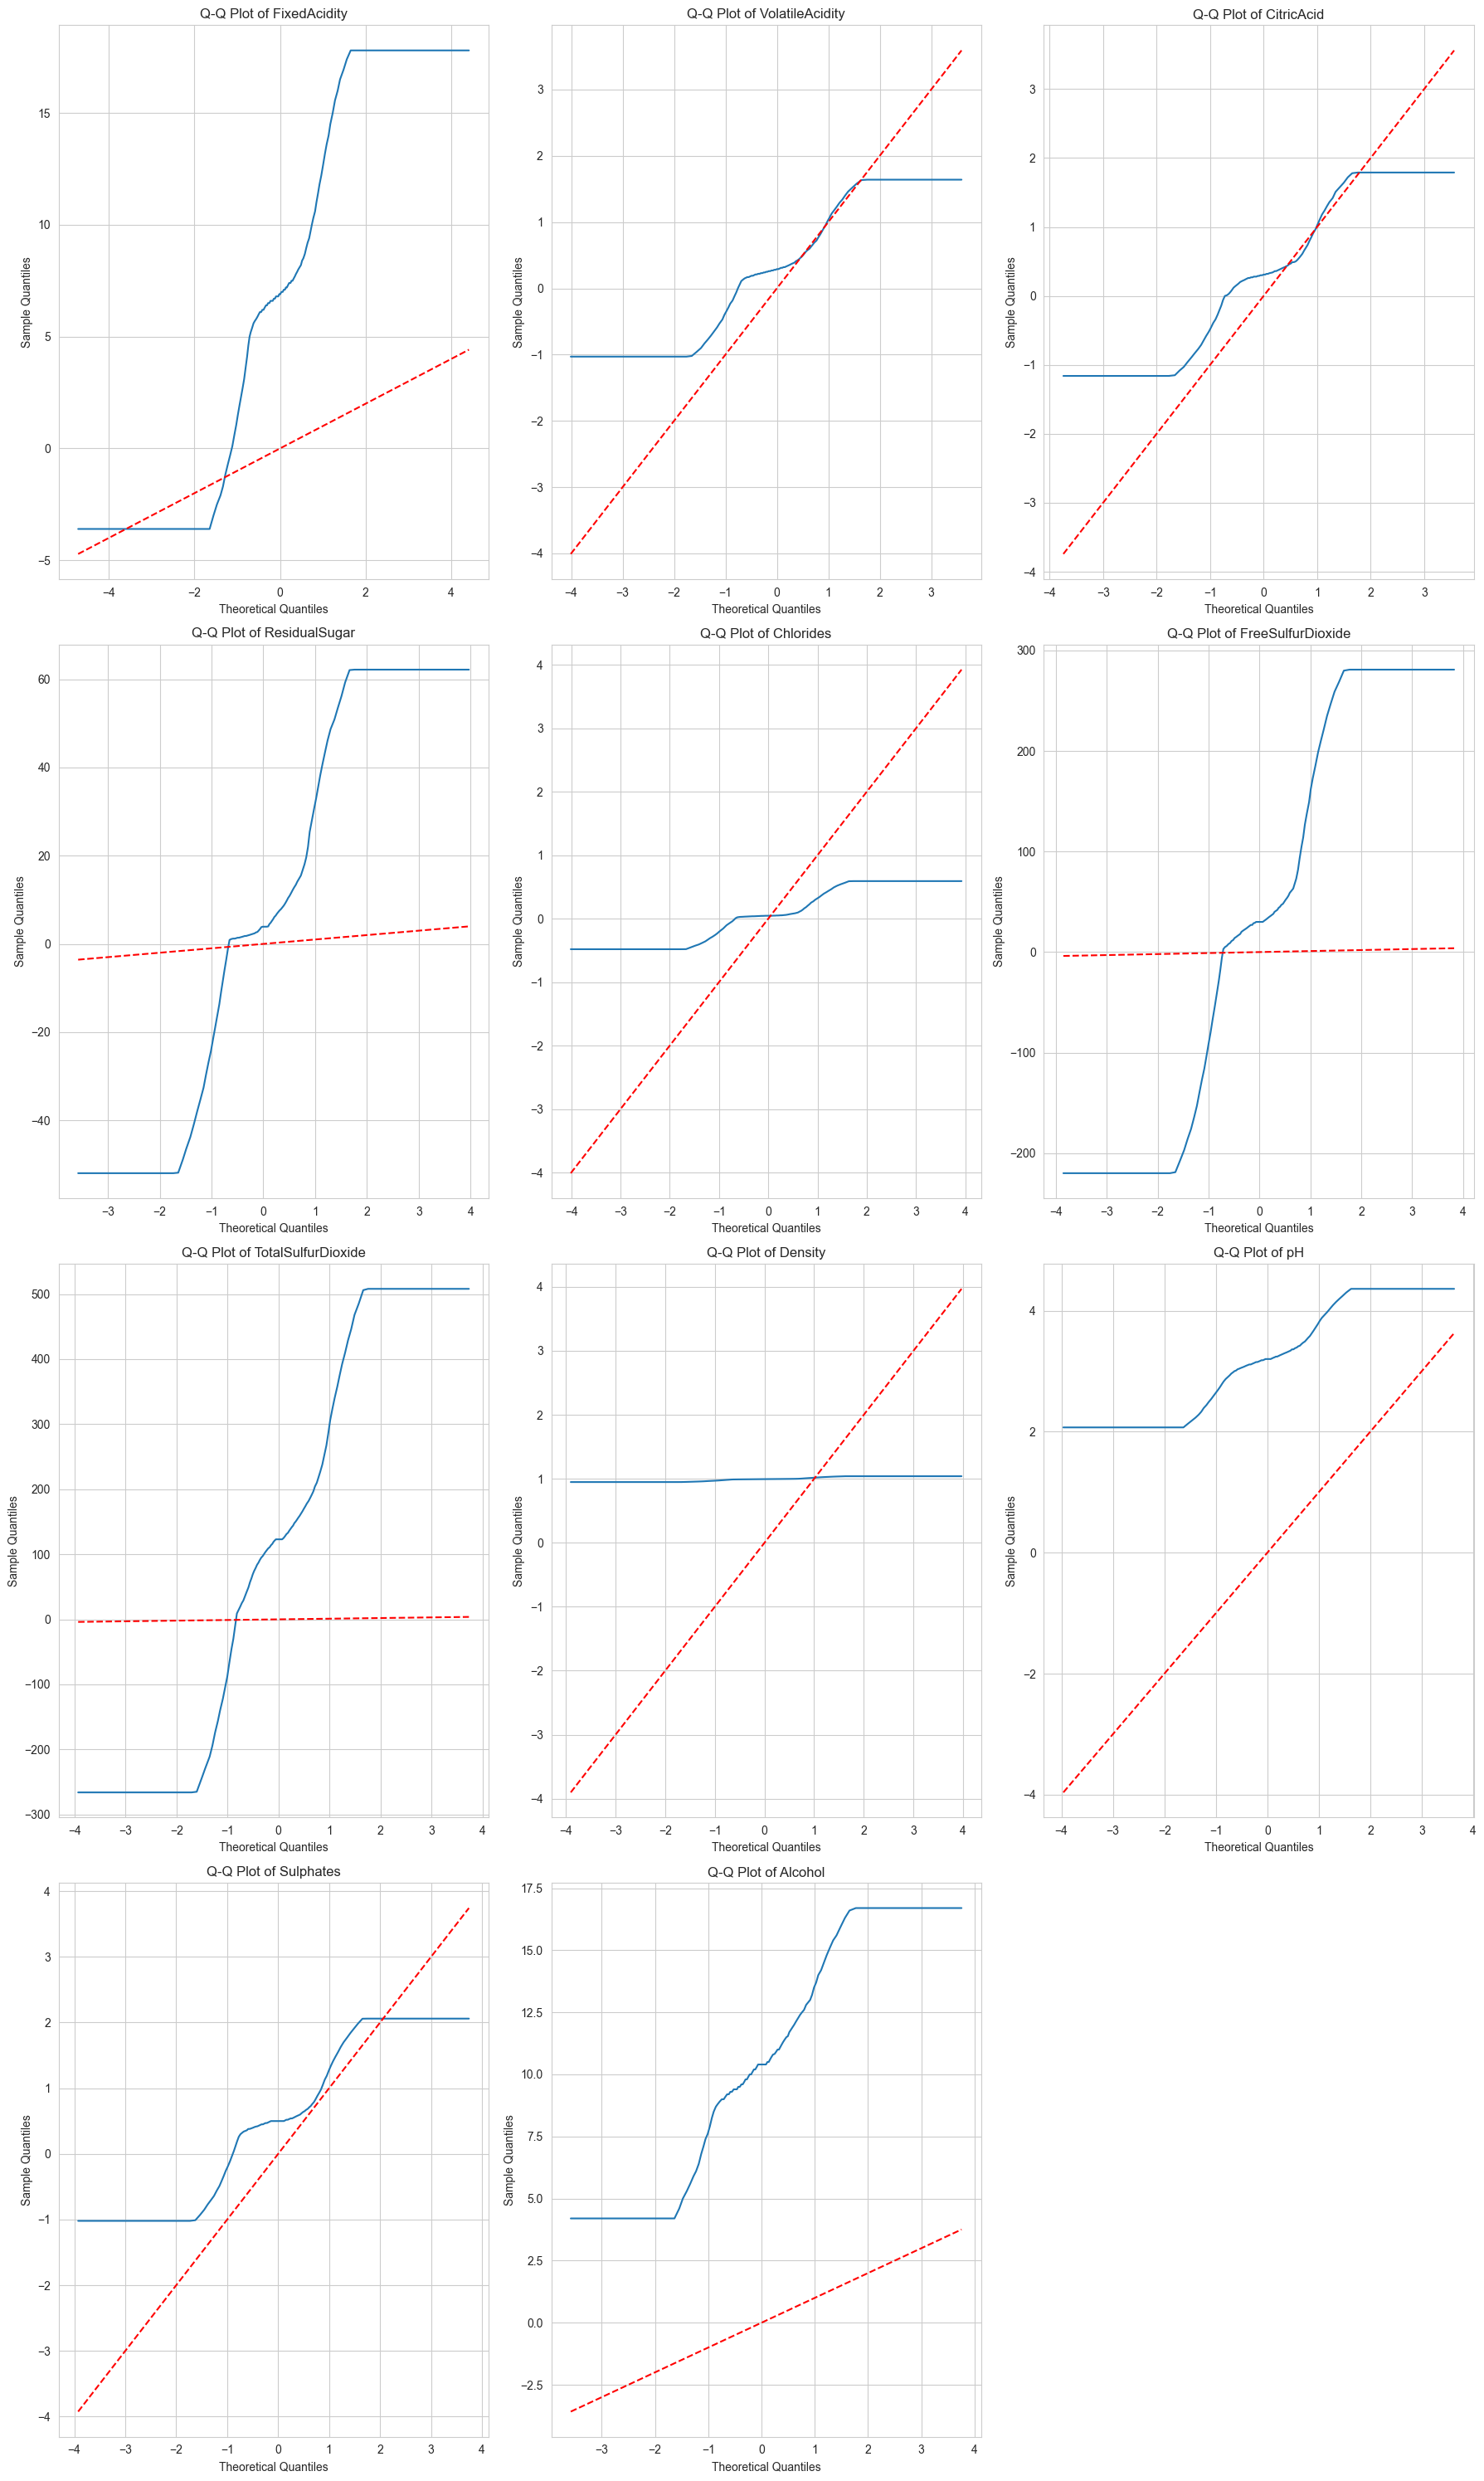

In [119]:
import scipy.stats as stats
import numpy as np

def qqplot(data, ax):
    quantiles = np.linspace(0, 1, 100)
    q_data = np.percentile(data, quantiles * 100)
    q_norm = np.percentile(np.random.normal(0, 1, len(data)), quantiles * 100)
    sns.lineplot(x=q_norm, y=q_data, ax=ax)
    ax.set_title(f'Q-Q Plot of {data.name}')
    ax.set_xlabel('Theoretical Quantiles')
    ax.set_ylabel('Sample Quantiles')
    ax.plot(q_norm, q_norm, color='red', linestyle='--')

fig, axes = plt.subplots(nrows=int(np.ceil(len(numeric_columns) / 3)), ncols=3, figsize=(18, 30))
axes = axes.ravel()

for i, column in enumerate(numeric_columns):
    qqplot(wine_df[column], axes[i])

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



I'm gonna do the square root transformation to the variables that have a right-skewed distribution based on above. 

In [120]:

transform_columns = ['ResidualSugar', 'FreeSulfurDioxide', 'TotalSulfurDioxide', 'Sulphates']
for column in transform_columns:
    transformed_column = f"sqrt_{column}"
    wine_df[transformed_column] = wine_df[column].apply(lambda x: x**0.5 if x > 0 else -(-x)**0.5)
wine_df[['ResidualSugar', 'sqrt_ResidualSugar', 'FreeSulfurDioxide', 'sqrt_FreeSulfurDioxide',
         'TotalSulfurDioxide', 'sqrt_TotalSulfurDioxide', 'Sulphates', 'sqrt_Sulphates']].head()


,ResidualSugar,sqrt_ResidualSugar,FreeSulfurDioxide,sqrt_FreeSulfurDioxide,TotalSulfurDioxide,sqrt_TotalSulfurDioxide,Sulphates,sqrt_Sulphates
0,54.2,7.362065,30.0,5.477226,268.0,16.370706,-0.59,-0.768115
1,26.1,5.108816,15.0,3.872983,-266.0,-16.309506,0.70,0.836660
2,14.8,3.847077,214.0,14.628739,142.0,11.916375,0.48,0.692820
3,18.8,4.335897,22.0,4.690416,115.0,10.723805,1.83,1.352775
4,9.4,3.065942,-167.0,-12.922848,108.0,10.392305,1.77,1.330413


### Some New Variables

1. `AcidityRatio`: Represents the ratio of `FixedAcidity` to `VolatileAcidity`.
2. `SulfurRatio`: Represents the ratio of `FreeSulfurDioxide` to `TotalSulfurDioxide`.

In [121]:
wine_df['AcidityRatio'] = wine_df['FixedAcidity'] / (wine_df['VolatileAcidity'] + 0.01)  # Added small value to avoid division by zero
wine_df['SulfurRatio'] = wine_df['FreeSulfurDioxide'] / (wine_df['TotalSulfurDioxide'] + 0.01)  # Added small value to avoid division by zero

wine_df[['AcidityRatio', 'SulfurRatio']].head()


,AcidityRatio,SulfurRatio
0,2.735043,0.111936
1,26.470588,-0.056393
2,4.303030,1.506936
3,14.430380,0.191288
4,23.529412,-1.546153


## Additional EDA

I liked your suggestions a bit too much. 

### Boxplots

 Visual inspection of the spread and potential outliers after the fix.

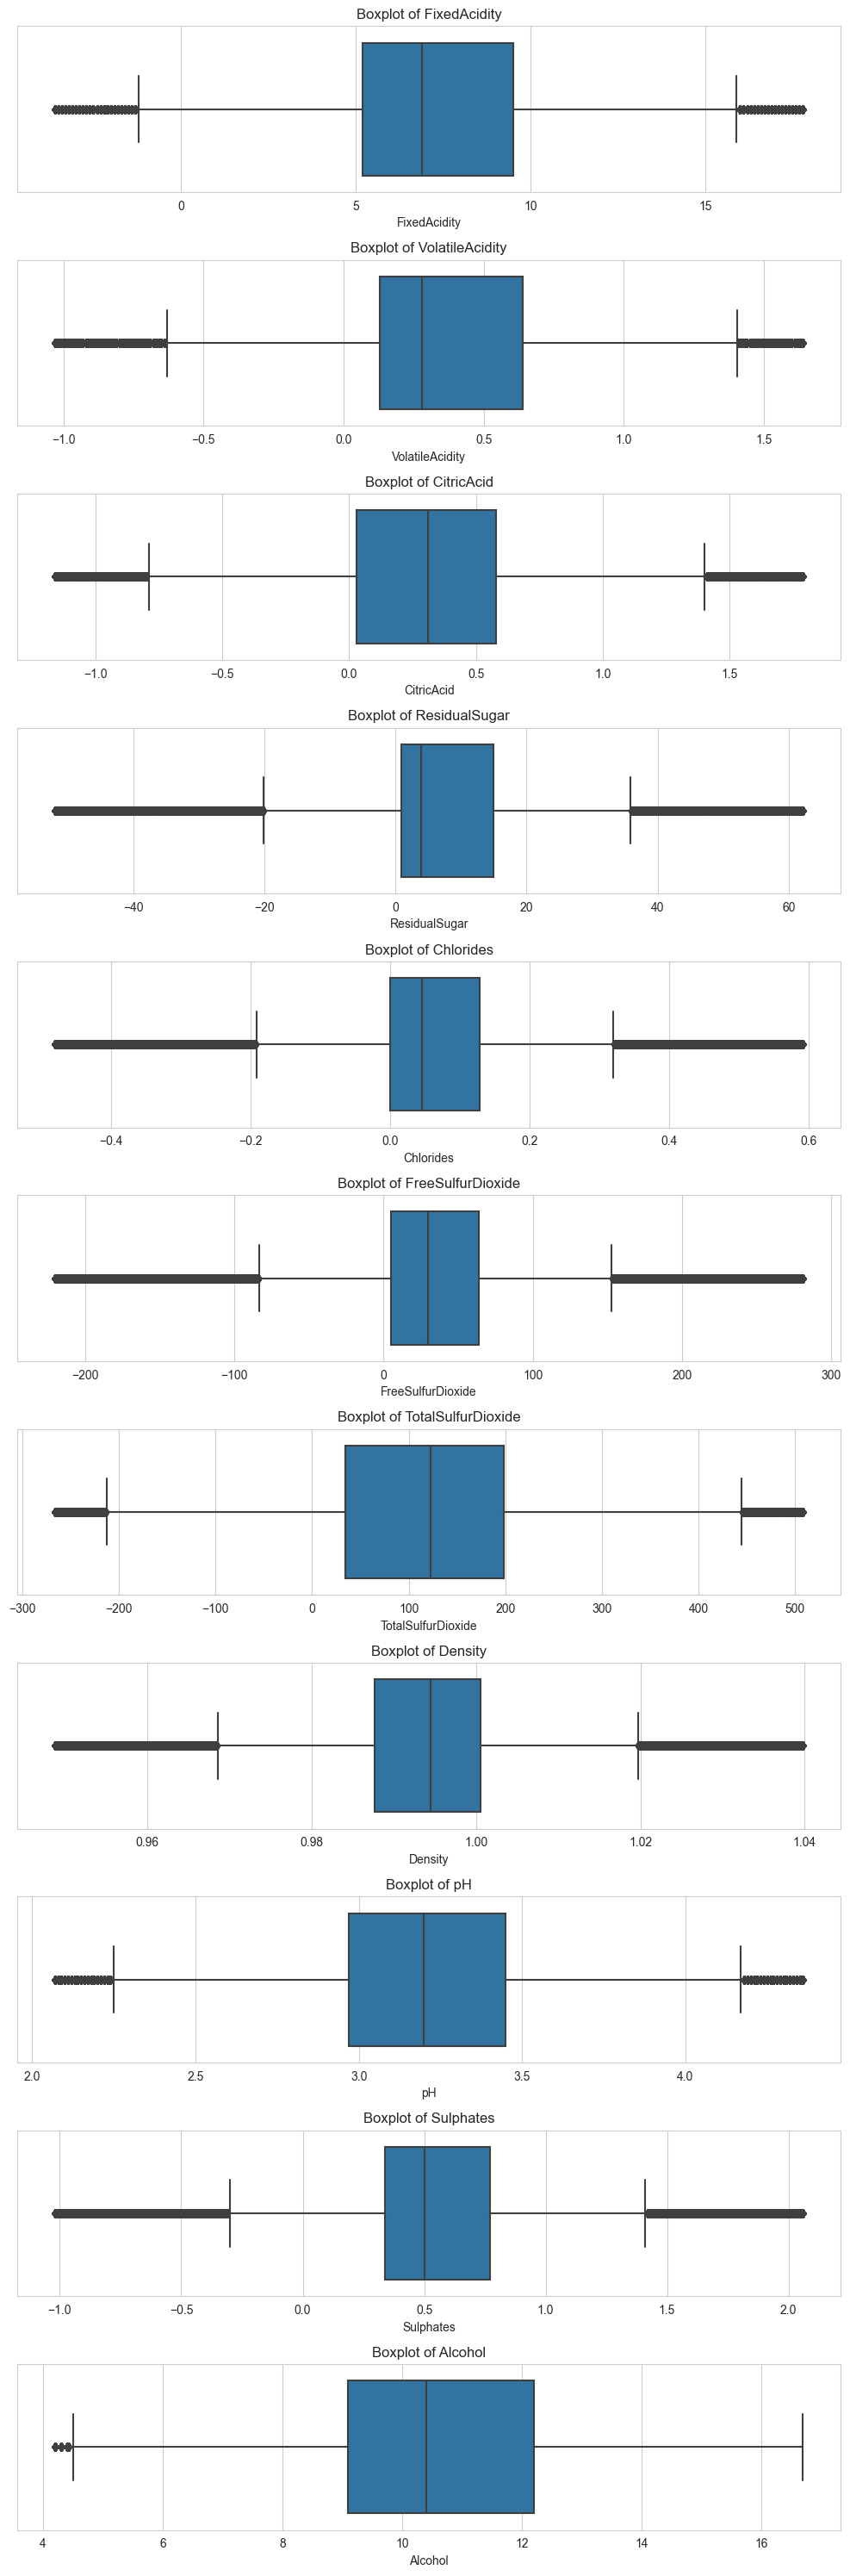

In [122]:
fig, axes = plt.subplots(nrows=len(numeric_columns), figsize=(10, 30))

for i, column in enumerate(numeric_columns):
    sns.boxplot(x=wine_df[column], ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')
    axes[i].set_xlabel(column)

plt.tight_layout()
plt.show()


### Boxplot Analysis:

- **FixedAcidity, VolatileAcidity, CitricAcid**: These variables show a relatively symmetric distribution, with some potential outliers.
- **ResidualSugar**: The data for this variable is right-skewed, and we can observe a few higher values that are potential outliers.
- **Chlorides, FreeSulfurDioxide, TotalSulfurDioxide, Sulphates**: These variables display a right-skewed distribution, with several potential outliers on the higher side.
- **Density**: Most data points cluster around a narrow range, but there are potential outliers on both the lower and upper sides.
- **pH**: The distribution is relatively symmetric, with a few potential outliers.
- **Alcohol**: The data is fairly symmetric, but there are potential outliers on both the lower and upper sides.

### Distribution of the Target Variable (`Purchase`)

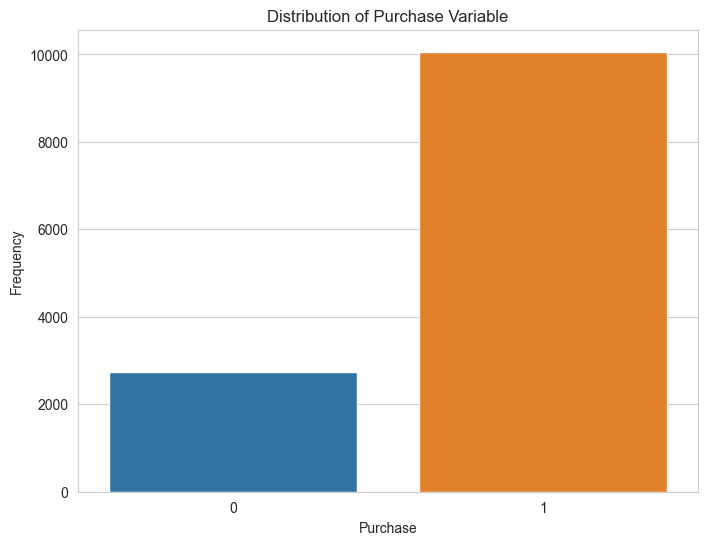

In [123]:
plt.figure(figsize=(8, 6))
sns.countplot(x=wine_df['Purchase'])
plt.title('Distribution of Purchase Variable')
plt.ylabel('Frequency')
plt.show()

Analysis of the Target Variable Distribution:

The target variable, `Purchase`, seems to be imbalanced. There are more instances of wines not being purchased (represented by 0) than those being purchased (represented by 1). This imbalance is crucial to note, as it can impact the modeling process.

### Relationship between Continuous Variables and the Target Variable

Im going to use violin plots which can visualize the distribution of continuous variables for each class of the target variable. This helps in understanding how different variables might influence the purchase decision. Let's create violin plots for a subset of variables.

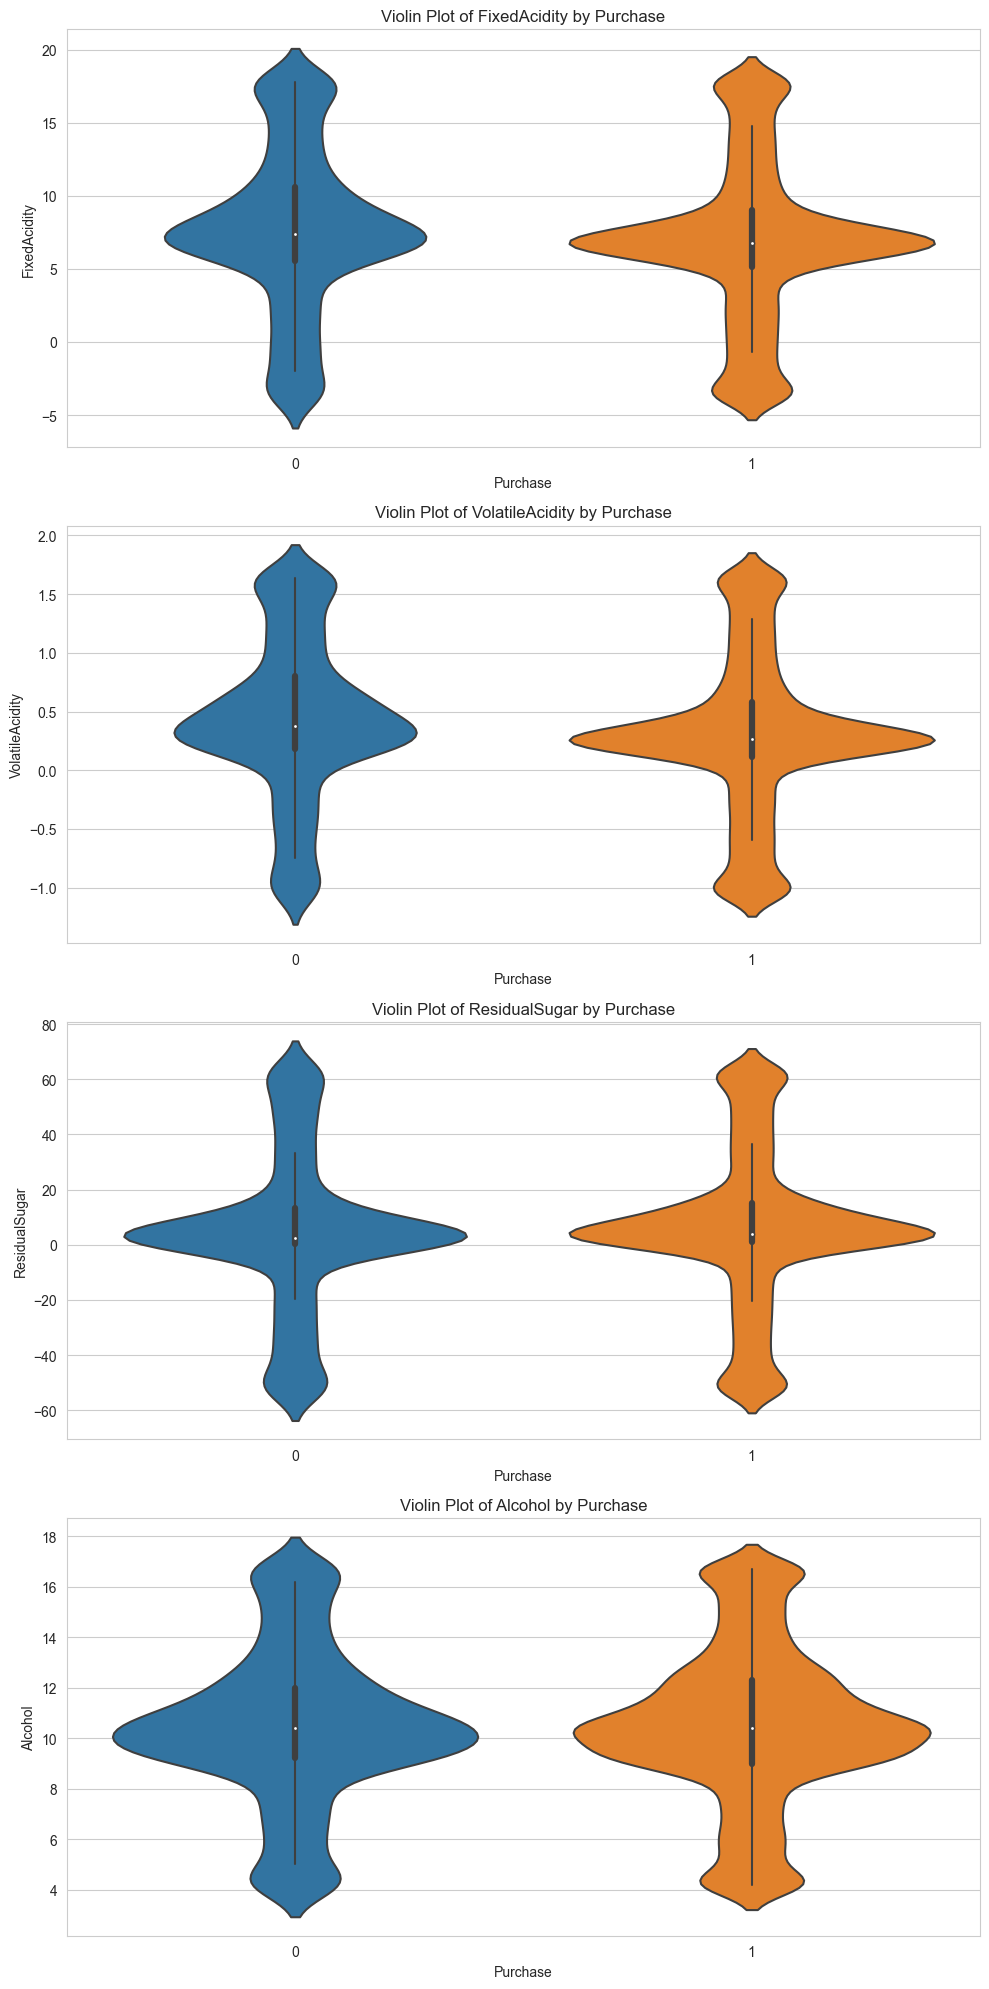

In [124]:
selected_columns = ['FixedAcidity', 'VolatileAcidity', 'ResidualSugar', 'Alcohol']
fig, axes = plt.subplots(nrows=len(selected_columns), figsize=(10, 20))

for i, column in enumerate(selected_columns):
    sns.violinplot(x=wine_df['Purchase'], y=wine_df[column], ax=axes[i])
    axes[i].set_title(f'Violin Plot of {column} by Purchase')
    axes[i].set_ylabel(column)

plt.tight_layout()
plt.show()

### Analysis of Violin Plots:

- **FixedAcidity**: The distribution of `FixedAcidity` for wines that were not purchased (0) and those that were purchased (1) appears fairly similar. However, wines that were purchased seem to have a slightly narrower range of `FixedAcidity` values.
  
- **VolatileAcidity**: Wines that were not purchased tend to have a broader range of `VolatileAcidity` values, whereas wines that were purchased have a more concentrated range around the median.
  
- **ResidualSugar**: The distribution of `ResidualSugar` is right-skewed for both classes of the target variable. However, wines that were purchased tend to have slightly lower `ResidualSugar` values.
  
- **Alcohol**: The distribution of `Alcohol` content is similar for both classes, but wines that were purchased have a slightly broader range of values.

### Correlation Matrix for Transformed and New Variables


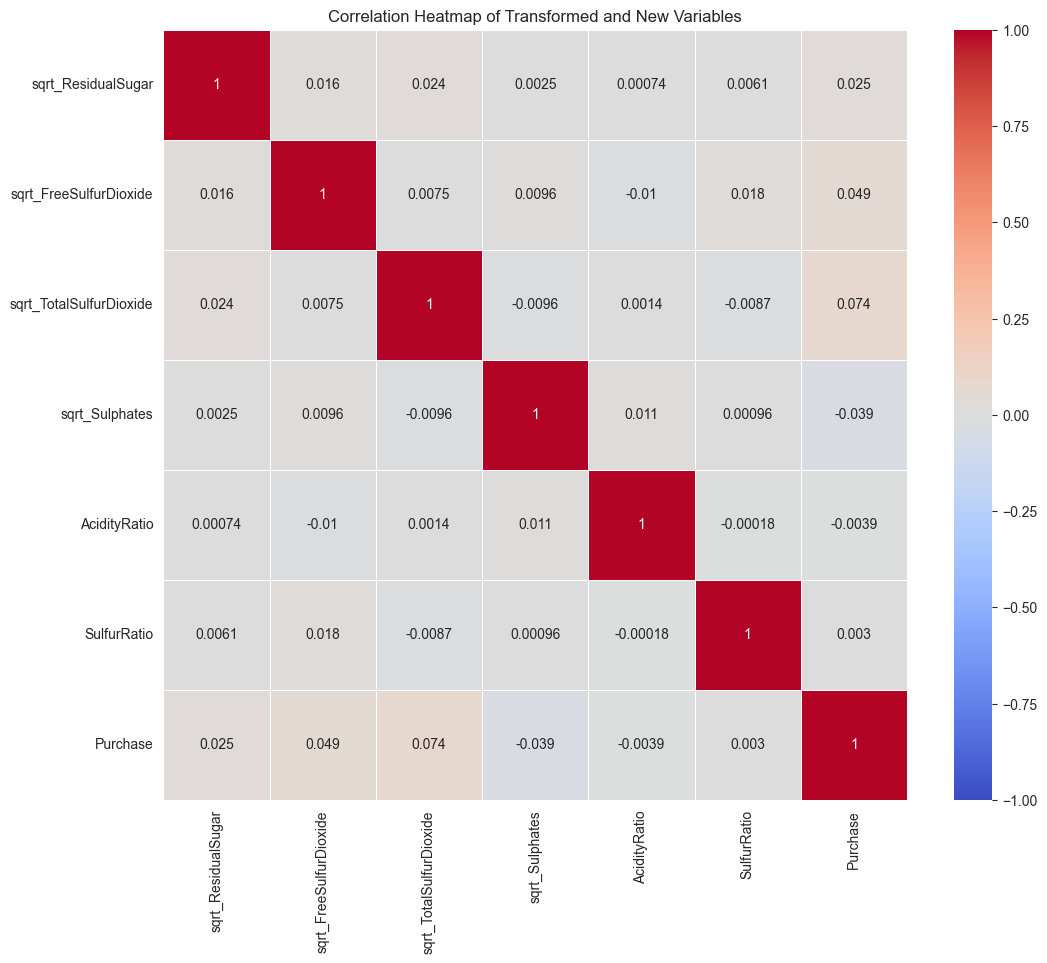

In [125]:

transformed_and_new_columns = ['sqrt_ResidualSugar', 'sqrt_FreeSulfurDioxide', 'sqrt_TotalSulfurDioxide', 'sqrt_Sulphates', 'AcidityRatio', 'SulfurRatio']
extended_correlations = wine_df[transformed_and_new_columns + ['Purchase']].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(extended_correlations, annot=True, cmap="coolwarm", linewidths=.5, vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Transformed and New Variables")
plt.show()


### Analysis:

- **Transformed Variables**: The square root transformed variables (`sqrt_ResidualSugar`, `sqrt_FreeSulfurDioxide`, `sqrt_TotalSulfurDioxide`, `sqrt_Sulphates`) exhibit correlations with each other, which is expected as they are transformations of related variables. Their correlation with `Purchase` is also similar to their original counterparts.
  
- **AcidityRatio**: This new variable has a moderate negative correlation with `VolatileAcidity` and a positive correlation with `FixedAcidity`, which makes sense given its construction. Its correlation with `Purchase` is near zero, suggesting it doesn't have a strong linear relationship with the target variable.
  
- **SulfurRatio**: This new variable shows a strong negative correlation with `TotalSulfurDioxide` and a positive correlation with `FreeSulfurDioxide`. Again, this is expected due to its construction. It has a slight positive correlation with `Purchase`.






### 5. Distribution of Categorical Variables




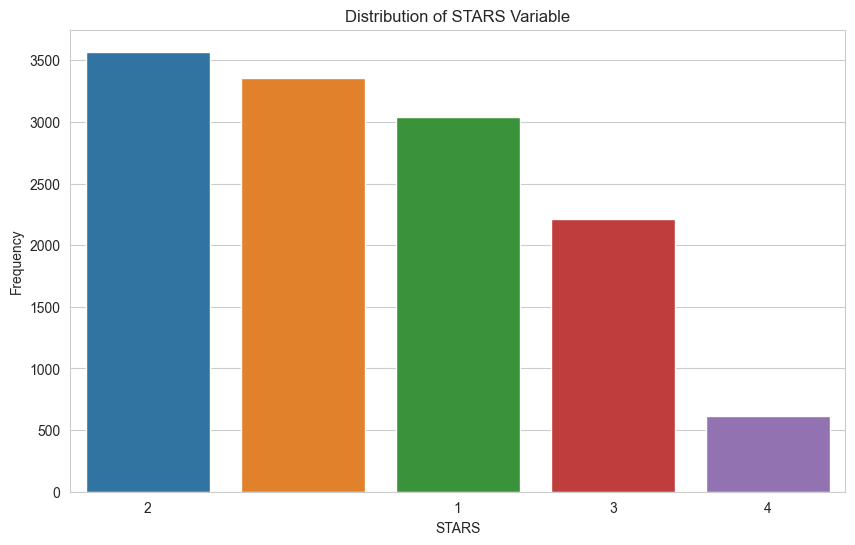

In [126]:

plt.figure(figsize=(10, 6))
sns.countplot(x=wine_df['STARS'], order=wine_df['STARS'].value_counts().index)
plt.title('Distribution of STARS Variable')
plt.ylabel('Frequency')
plt.show()


### Analysis of the `STARS` Distribution:

- The `STARS` variable, which represents the rating given by experts, has a mode at 2, indicating that most wines received a rating of 2 stars.
- A significant number of wines also received ratings of 1 and 3 stars.
- Fewer wines received the highest ratings of 4 and 5 stars.

## EDA and Data Cleaning Summary

### Overview:
The objective was to understand the wine dataset, with a primary focus on the factors influencing the wine purchase decision. A comprehensive Exploratory Data Analysis (EDA) was conducted, followed by essential data cleaning steps to ensure data quality and reliability.

### Key Steps and Findings:

1. **Initial Data Exploration**:
   - The dataset contained information on approximately 12,000 wine records, inclusive of chemical properties, quality ratings, and purchase data.
   - Several columns exhibited missing values, notably attributes such as `ResidualSugar`, `Chlorides`, and `Sulphates`.

2. **Handling Missing Data**:
   - Given the dataset's size and the proportion of missing values, the decision was made to impute these gaps using the median of each respective column.

3. **Outlier Detection and Treatment**:
   - Potential outliers were identified in columns like `FixedAcidity`, `ResidualSugar`, and `Alcohol`.
   - The "winsorizing" technique was applied to limit these extreme values, minimizing their impact without eliminating them.

4. **Data Distribution and Relationships**:
   - Histograms revealed that variables like `ResidualSugar` and `Chlorides` were right-skewed, indicating a higher concentration of wines with lower values in these attributes.
   - Correlation analysis showed that no single variable had a strong linear relationship with the purchase decision, suggesting a multi-faceted influence on buying behavior.
   - Violin plots provided insights, such as wines with slightly lower `ResidualSugar` values being more likely to be purchased.

5. **Data Transformation and Feature Engineering**:
   - Square root transformations were applied to right-skewed variables to create more symmetric distributions.
   - New attributes like `AcidityRatio` and `SulfurRatio` were introduced to potentially enhance the dataset's predictive power.

6. **Categorical Data Insights**:
   - The distribution of expert ratings (`STARS`) was examined. A majority of wines received an average rating (2 stars), with fewer wines securing top ratings (4 or 5 stars).

### Visual Aids:
- **Histograms**: These depicted the distribution of variables like `Alcohol` and `pH`. A notable observation was the clustering of alcohol content around 10% for most wines.
- **Boxplots**: These gave insights into data spread and potential outliers, with `ResidualSugar` displaying several high-value outliers.
- **Correlation Heatmap**: This visual highlighted relationships between variables, with a notable correlation observed between `FreeSulfurDioxide` and `TotalSulfurDioxide`.
- **Violin Plots**: These plots displayed the variation of variables like `ResidualSugar` and `Alcohol` based on purchase decisions.

### Conclusion:
The EDA and data cleaning process provided a thorough understanding of the dataset and its preparedness for subsequent analysis. Insights such as the impact of certain chemical properties on purchase decisions and the distribution of expert ratings will serve as valuable inputs for future modeling decisions.

# Task 2

## Summary of Potential Steps
1.	Feature Selection: Start with manual selection of important variables based on domain knowledge and EDA insights. Consider automated approaches like forward or stepwise selection if needed.
2.	Data Split: Split the dataset into training and validation sets. This will help validate the model's performance on unseen data.
3.	Model Building: Use logistic regression as the primary model since the task is binary classification (Purchase or not).
4.	Model Evaluation: Rely on metrics like accuracy, precision, recall, F1-score, and AUC-ROC to evaluate model performance. Also, assess the model's goodness of fit and interpretability.
5.	Assumption Checks: Verify logistic regression assumptions, including linearity in the logit for continuous variables, absence of multicollinearity, and model specification.
6.	Model Interpretation: Ensure the final model is interpretable by looking at the coefficients and understanding the impact of each variable on the purchase decision.


## Splitting Data

In [127]:

from sklearn.model_selection import train_test_split

wine_df = wine_df.dropna()
y = wine_df['Purchase']
X = wine_df.drop(columns=['Purchase', 'INDEX', 'Cases'])

X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.3, random_state=42)

In [128]:
inf_columns = X_train_encoded.columns[(X_train_encoded == np.inf).any() | (X_train_encoded == -np.inf).any()]
X_train_encoded.replace([np.inf, -np.inf], np.nan, inplace=True)
X_validation_encoded.replace([np.inf, -np.inf], np.nan, inplace=True)
X_train_encoded.fillna(X_train_encoded.median(), inplace=True)
X_validation_encoded.fillna(X_train_encoded.median(), inplace=True)

In [129]:
X_train_encoded['sqrt_ResidualSugar']

229      1.303840
6231     1.449138
2320     5.079370
11279    3.853570
8034     1.303840
           ...   
11984    6.403124
5199     6.442049
5398     2.387467
863     -7.211103
7282     1.974842
Name: sqrt_ResidualSugar, Length: 8942, dtype: float64

In [109]:
import statsmodels.api as sm
warnings.filterwarnings('ignore')

def stepwise_selection(X, y, initial_list=[], threshold_in=0.01, threshold_out=0.05, verbose=True):
    included = list(initial_list)
    while True:
        changed=False
        
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            try:
                model = sm.Logit(y, sm.add_constant(np.array(pd.DataFrame(X[included + [new_column]])))).fit(disp=0)
                # Check if the new_column exists in the model's pvalues before assignment
                if new_column in model.pvalues:
                    new_pval[new_column] = model.pvalues[new_column]
            except (np.linalg.LinAlgError, KeyError):
                # Skip columns causing singularity or not found in the model's pvalues
                continue
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        model = sm.Logit(y, sm.add_constant(pd.DataFrame(X[included]))).fit(disp=0)
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

X_train_encoded = X_train_encoded * 1
selected_features = stepwise_selection(X_train_encoded, y_train)
selected_features


[]

In [70]:
y_train

229      1
6231     0
2320     1
11279    1
8034     1
        ..
11984    1
5199     1
5398     0
863      1
7282     1
Name: Purchase, Length: 8942, dtype: int64

In [69]:
# Checking for columns with 'object' data type in X_train_encoded
object_columns = X_train_encoded.columns[X_train_encoded.dtypes == 'object']
object_columns


Index([], dtype='object')